In [1]:
from Binaries import *
from scipy.optimize import curve_fit

# For VEM Peak

0/2401 /cr/tempdata01/filip/iRODS/corrected/jaco_randoms0002.csv: 5000 traces
1/2401 /cr/tempdata01/filip/iRODS/corrected/jaco_randoms0000.csv: 5000 traces
2/2401 /cr/tempdata01/filip/iRODS/corrected/jaco_randoms0001.csv: 5000 traces
3/2401 /cr/tempdata01/filip/iRODS/corrected/jaco_randoms0003.csv: 5000 traces
4/2401 /cr/tempdata01/filip/iRODS/corrected/jaco_randoms0004.csv: 5000 traces
5/2401 /cr/tempdata01/filip/iRODS/corrected/jaco_randoms0751.csv: 5000 traces
6/2401 /cr/tempdata01/filip/iRODS/corrected/jaco_randoms0005.csv: 5000 traces


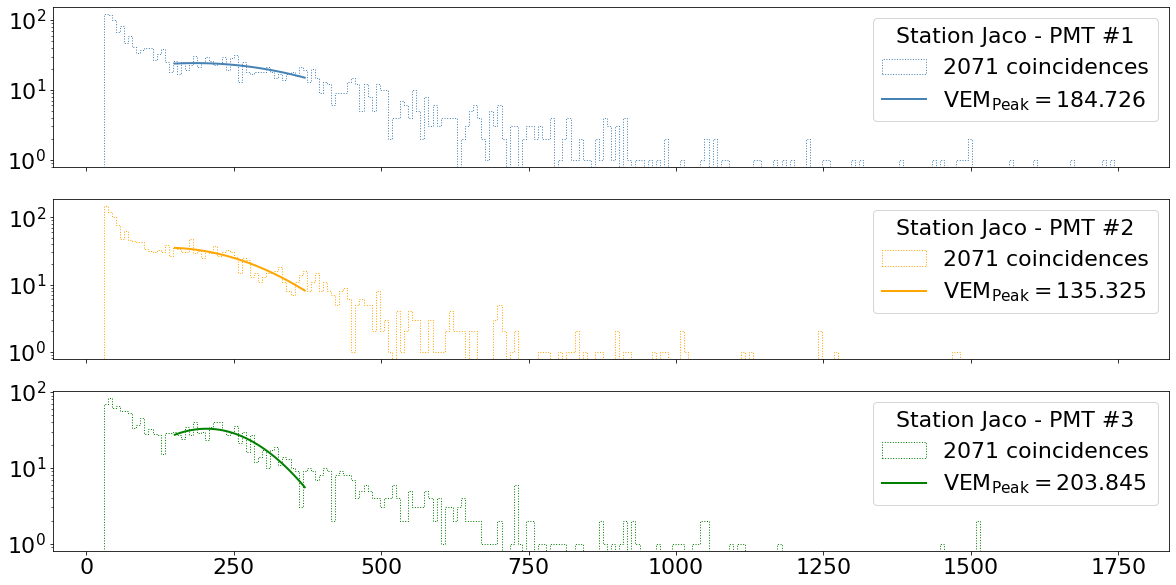

In [3]:
peak_evolution = []
cut_threshold = 30
leading_bins = 20
trailing_bins = 69 - leading_bins
multiplicity = 1
dead_time = trailing_bins

mode = "peak"

if mode == "peak":

    x_range = (cut_threshold, 1750)
    i, f = 17, 50
    func = max

elif mode == "charge":

    x_range = (cut_threshold, 12000)
    i, f = 30, 70
    func = sum

first_trigger = lambda x : np.argmax(x > cut_threshold)


def gauss(x, mu, A, sigma):

    return A * np.exp( -(x - mu)**2 / (2 * sigma**2) )

colors = ["steelblue", "orange", "green"]

h1, h2, h3 = [], [], []

for index in range(7):

    Buffer = RandomTrace(index)
    
    vem_peak = []

    print(f"{index}/{RandomTrace.all_n_files} {RandomTrace.baseline_dir + RandomTrace.all_files[index]}: {len(Buffer._these_traces)} traces" )



    station = np.array(Buffer._these_traces)
    pmt1, pmt2, pmt3 = station[:,0], station[:,1], station[:,2]
    cut_mask = np.logical_and(np.any(pmt1 > cut_threshold, axis = 1), np.any(pmt2 > cut_threshold, axis = 1), np.any(pmt3 > cut_threshold, axis = 1))

    for (p1, p2, p3) in zip(pmt1[cut_mask], pmt2[cut_mask], pmt3[cut_mask]):

        # STRONG COINCIDENCE
        for step in range(min([first_trigger(p1), first_trigger(p2), first_trigger(p3)]), 2048):

            trigger_list = [p1[step] > cut_threshold, p1[step] > cut_threshold, p1[step] > cut_threshold]

            if trigger_list.count(True) >= multiplicity:

                start, stop = max(0, step - i), min(2048, step + f)

                p1_data, p2_data, p3_data = p1[start : stop], p2[start : stop], p3[start : stop]
                h1.append(func(p1_data)), h2.append(func(p2_data)), h3.append(func(p3_data))
                
                # step += dead_time       # keep iterating
                break                     # stop after first hit
       
        # # WEAK COINCIDENCE
        # trigger_bin = np.argmax(p1 > cut_threshold)
        # start = max(0, trigger_bin - leading_bins)
        # stop = min(trigger_bin + trailing_bins, 2048)

        # p1_data, p2_data, p3_data = p1[start : stop], p2[start : stop], p3[start : stop]

        # if np.any(p2_data > cut_threshold) and np.any(p3_data > cut_threshold):

        #     h1.append(func(p1_data)), h2.append(func(p2_data)), h3.append(func(p3_data))

fig, axes = plt.subplots(3, 1, sharex = True)
# axes[0].set_title(RandomTrace.all_files[index])
name = RandomTrace.all_files[index].split("_")[0]

for j, histogram in enumerate([h1, h2, h3]):

    # untriggered = [not thing for thing in cut_mask]
    # untriggered_data = [np.array([pmt1[untriggered], pmt2[untriggered], pmt3[untriggered]])[j].max(axis = 1)]
    # axes[j].hist(untriggered_data, bins = 250, range = x_range, label = f"PMT {j + 1}: untriggered traces", ls = "--", histtype = "step", color = colors[i])
    
    # all_data = np.concatenate([pmt1, pmt2, pmt3][j])
    # axes[j].hist(all_data, bins = 250, range = x_range, label = f"all {len(Buffer._these_traces)} traces", ls = "solid", histtype = "step", color = colors[j])

    n, bins, _ = axes[j].hist(histogram,  bins = 250, range = x_range, label = f"{len(histogram)} coincidences", ls = ":", histtype = "step", color = colors[j])
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    x, y = bin_centers[i : f], n[i : f]
    x_smooth = np.linspace(min(x), max(x), 100)

    popt, pcov = curve_fit(gauss, x, y, p0 = [x[np.argmax(y)], 10, sum(y)], bounds = ([0, 0, 0], [np.inf, np.inf, np.inf]) )
    model_fit = gauss(x_smooth, *popt)
    peak_estimate = popt[0]

    label = r"$\mathrm{VEM}_\mathrm{Peak} = $" if mode == "peak" else r"$\mathrm{VEM}_\mathrm{Charge} = $"
    label += f"{peak_estimate:.3f}"

    axes[j].plot(x_smooth, model_fit, lw = 2, label = label, c = colors[j])
    axes[j].legend(title = f"Station {name.capitalize()} - PMT #{j + 1}")
    axes[j].set_yscale("log")


    vem_peak.append(peak_estimate)

peak_evolution.append(vem_peak)

0/2401 /cr/tempdata01/filip/iRODS/corrected/jaco_randoms0002.csv: 5000 traces
1/2401 /cr/tempdata01/filip/iRODS/corrected/jaco_randoms0000.csv: 5000 traces
2/2401 /cr/tempdata01/filip/iRODS/corrected/jaco_randoms0001.csv: 5000 traces
3/2401 /cr/tempdata01/filip/iRODS/corrected/jaco_randoms0003.csv: 5000 traces
4/2401 /cr/tempdata01/filip/iRODS/corrected/jaco_randoms0004.csv: 5000 traces
5/2401 /cr/tempdata01/filip/iRODS/corrected/jaco_randoms0751.csv: 5000 traces
6/2401 /cr/tempdata01/filip/iRODS/corrected/jaco_randoms0005.csv: 5000 traces


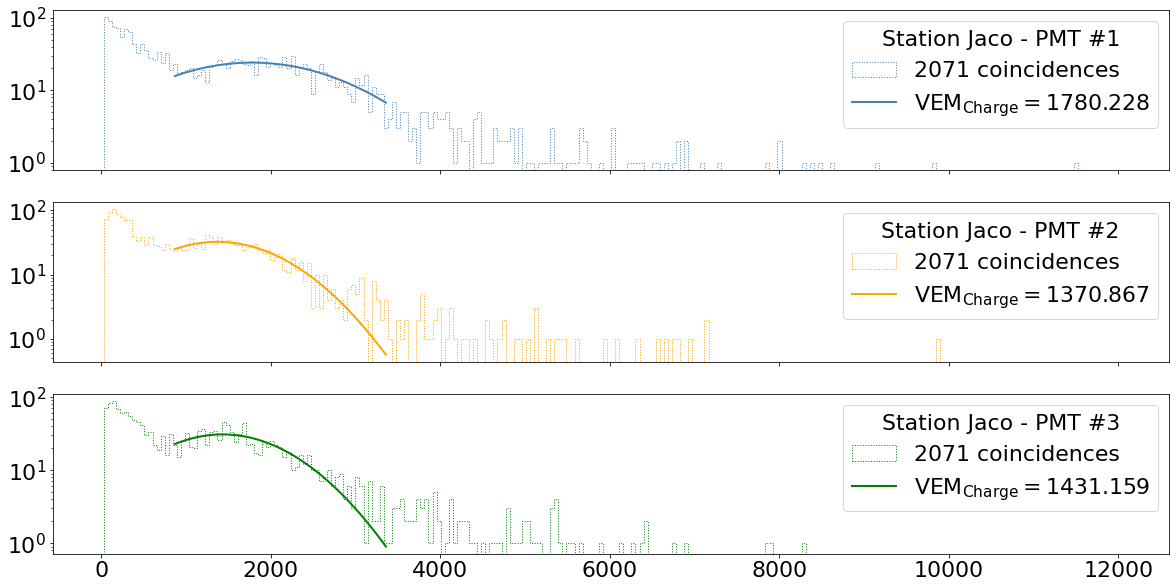

In [7]:
peak_evolution = []
cut_threshold = 30
leading_bins = 20
trailing_bins = 69 - leading_bins
multiplicity = 1
dead_time = trailing_bins

mode = "charge"

if mode == "peak":

    x_range = (cut_threshold, 1750)
    i, f = 17, 50
    func = max

elif mode == "charge":

    x_range = (cut_threshold, 12000)
    i, f = 17, 70
    func = sum

first_trigger = lambda x : np.argmax(x > cut_threshold)


def gauss(x, mu, A, sigma):

    return A * np.exp( -(x - mu)**2 / (2 * sigma**2) )

colors = ["steelblue", "orange", "green"]

h1, h2, h3 = [], [], []

for index in range(7):

    Buffer = RandomTrace(index)
    
    vem_peak = []

    print(f"{index}/{RandomTrace.all_n_files} {RandomTrace.baseline_dir + RandomTrace.all_files[index]}: {len(Buffer._these_traces)} traces" )



    station = np.array(Buffer._these_traces)
    pmt1, pmt2, pmt3 = station[:,0], station[:,1], station[:,2]
    cut_mask = np.logical_and(np.any(pmt1 > cut_threshold, axis = 1), np.any(pmt2 > cut_threshold, axis = 1), np.any(pmt3 > cut_threshold, axis = 1))

    for (p1, p2, p3) in zip(pmt1[cut_mask], pmt2[cut_mask], pmt3[cut_mask]):

        # STRONG COINCIDENCE
        for step in range(min([first_trigger(p1), first_trigger(p2), first_trigger(p3)]), 2048):

            trigger_list = [p1[step] > cut_threshold, p1[step] > cut_threshold, p1[step] > cut_threshold]

            if trigger_list.count(True) >= multiplicity:

                start, stop = max(0, step - i), min(2048, step + f)

                p1_data, p2_data, p3_data = p1[start : stop], p2[start : stop], p3[start : stop]
                h1.append(func(p1_data)), h2.append(func(p2_data)), h3.append(func(p3_data))
                
                # step += dead_time       # keep iterating
                break                     # stop after first hit
       
        # # WEAK COINCIDENCE
        # trigger_bin = np.argmax(p1 > cut_threshold)
        # start = max(0, trigger_bin - leading_bins)
        # stop = min(trigger_bin + trailing_bins, 2048)

        # p1_data, p2_data, p3_data = p1[start : stop], p2[start : stop], p3[start : stop]

        # if np.any(p2_data > cut_threshold) and np.any(p3_data > cut_threshold):

        #     h1.append(func(p1_data)), h2.append(func(p2_data)), h3.append(func(p3_data))

fig, axes = plt.subplots(3, 1, sharex = True)
# axes[0].set_title(RandomTrace.all_files[index])
name = RandomTrace.all_files[index].split("_")[0]

for j, histogram in enumerate([h1, h2, h3]):

    # untriggered = [not thing for thing in cut_mask]
    # untriggered_data = [np.array([pmt1[untriggered], pmt2[untriggered], pmt3[untriggered]])[j].max(axis = 1)]
    # axes[j].hist(untriggered_data, bins = 250, range = x_range, label = f"PMT {j + 1}: untriggered traces", ls = "--", histtype = "step", color = colors[i])
    
    # all_data = np.concatenate([pmt1, pmt2, pmt3][j])
    # axes[j].hist(all_data, bins = 250, range = x_range, label = f"all {len(Buffer._these_traces)} traces", ls = "solid", histtype = "step", color = colors[j])

    n, bins, _ = axes[j].hist(histogram,  bins = 250, range = x_range, label = f"{len(histogram)} coincidences", ls = ":", histtype = "step", color = colors[j])
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    x, y = bin_centers[i : f], n[i : f]
    x_smooth = np.linspace(min(x), max(x), 100)

    popt, pcov = curve_fit(gauss, x, y, p0 = [x[np.argmax(y)], 10, sum(y)], bounds = ([0, 0, 0], [np.inf, np.inf, np.inf]) )
    model_fit = gauss(x_smooth, *popt)
    peak_estimate = popt[0]

    label = r"$\mathrm{VEM}_\mathrm{Peak} = $" if mode == "peak" else r"$\mathrm{VEM}_\mathrm{Charge} = $"
    label += f"{peak_estimate:.3f}"

    axes[j].plot(x_smooth, model_fit, lw = 2, label = label, c = colors[j])
    axes[j].legend(title = f"Station {name.capitalize()} - PMT #{j + 1}")
    axes[j].set_yscale("log")


    vem_peak.append(peak_estimate)

peak_evolution.append(vem_peak)